<a href="https://colab.research.google.com/github/ShephaliJain/Shephali_Data_Analyst_Portfolio_Projects/blob/main/Text_Mining/TextMiningProject_ArcticleCategorizationPrediction_TF_IDF_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 01- Text Mining**

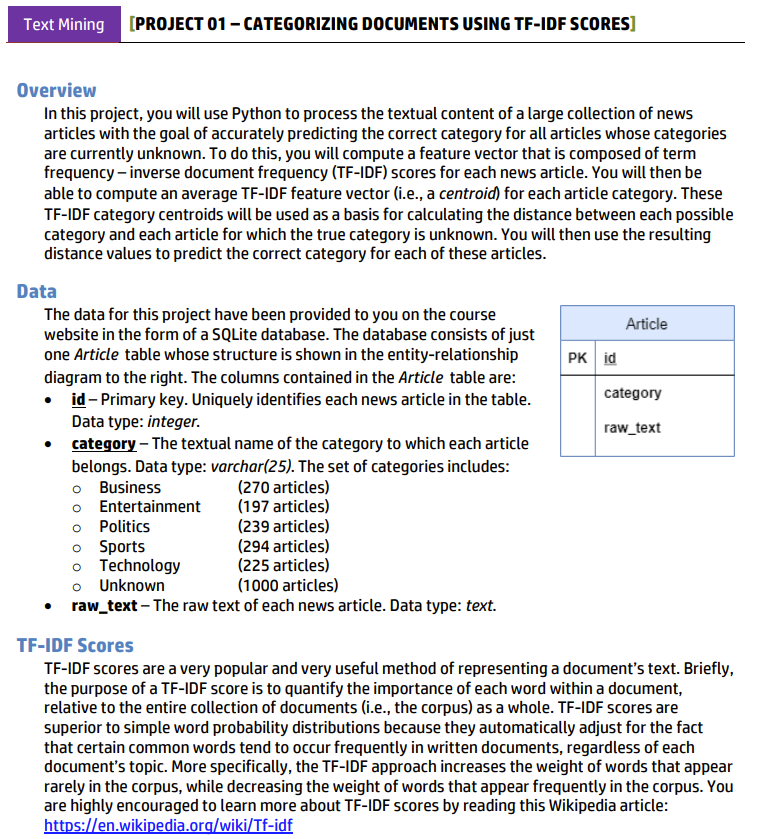

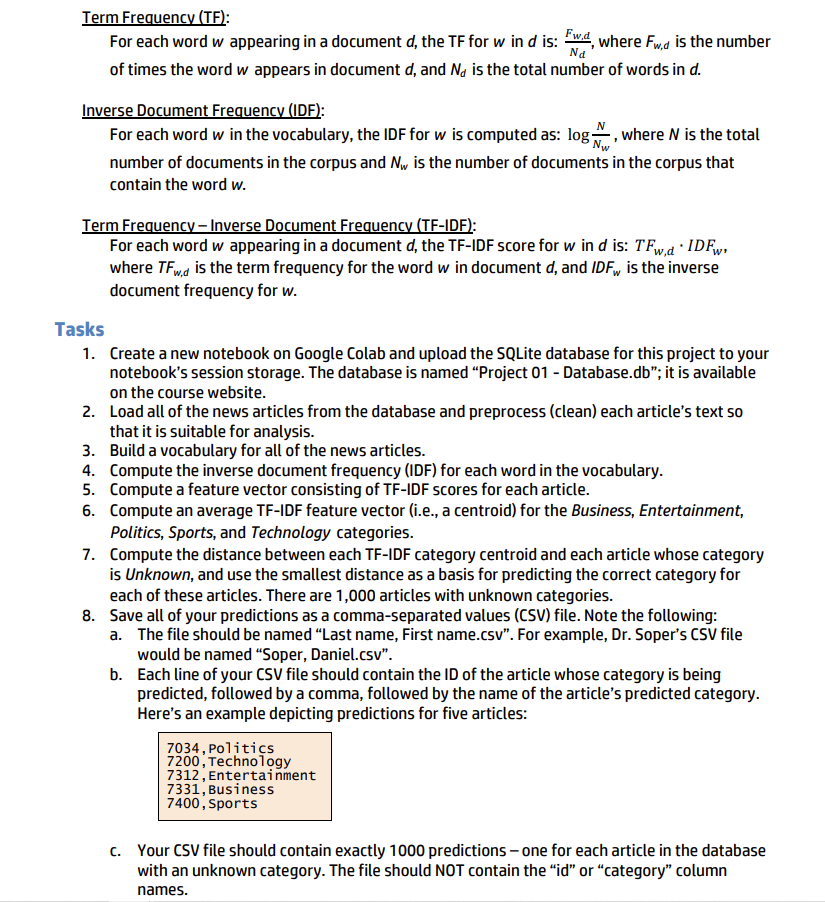

**Task1: Create a new notebook on Google Colab and upload the SQLite database for this project to your 
notebook’s session storage. The database is named “Project 01 - Database.db”; it is available 
on the course website.**


### Mandatory: Import the necessary libraries

Python has a small core set of capabilities with a very large set of libraries. This allows us to import specialized functionality into our programs on an as-needed basis.

Run the code cell below to import all of the libraries that we'll need for this lab assignment.

In [1]:
#import libraries
import numpy as np #used to quickly perform mathematical calculations on vectors
import pandas as pd #allows us to work with data using Pandas dataframes
import re #regular expressions; used in this assignment to clean the text data
import sqlite3
import seaborn as sns
import math #used to interact with the database
from collections import Counter #used to quickly count letters and words

### Load Data

In [2]:
#open a connection to the database
conn = sqlite3.connect('Project 01 - Database.db')

#load all documents into a Pandas dataframe named 'df', and use the 'document_id' column as the index
sql = 'SELECT * FROM Article'
df = pd.read_sql_query(sql, conn)

#close database connection
conn.close()

**Task2: Load all of the news articles from the database and preprocess (clean) each article’s text so 
that it is suitable for analysis.**


### Data Exploration

In [3]:
#show the first 10 rows of data
df.head(10)

,id,category,raw_text
0,6347,Politics,Hiding women away in the home hidden behind ve...
1,13840,Sports,Celtic brushed aside Clyde to secure their pla...
2,14775,Unknown,"If you have finished Doom 3, Half Life 2 and H..."
3,16641,Unknown,Controversial new UK casinos will be banned fr...
4,17511,Unknown,Justine Henin-Hardenne lost to Elena Dementiev...
5,19326,Unknown,The two most senior executives at US mortgage ...
6,19971,Unknown,Munster's Heineken Cup quarter-final tie again...
7,23975,Business,British car maker Aston Martin has gone head-t...
8,25850,Technology,Some of the most vivid descriptions of the dev...
9,28514,Technology,UK mobile owners continue to break records wit...


In [4]:
#list unique values
for col in df.columns:
    print(col,df[col].nunique(),sep='\t')

id	2225
category	6
raw_text	2089


In [5]:
# Find all category
category = list(df['category'].unique())
category


['Politics', 'Sports', 'Unknown', 'Business', 'Technology', 'Entertainment']

In [6]:
pd.crosstab(df.category, len(df.category))


col_0,2225
category,
Business,270
Entertainment,197
Politics,239
Sports,294
Technology,225
Unknown,1000


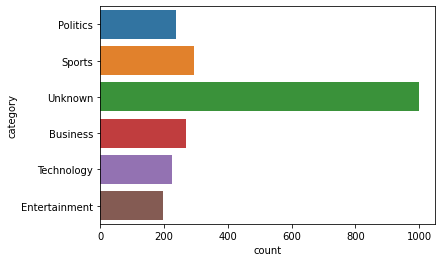

In [7]:
sns.countplot(y="category", data=df)

In [8]:
# Check null values
df.isnull().sum() #we have to consider Unknown as Null and later need to do predictions for these 1000 Unknown values of category

id          0
category    0
raw_text    0
dtype: int64

### 2. Prepare Data for Analysis

In [9]:
#split the dataset into  different dataframes, with one dataframe per category
category_list = ['Business', 'Entertainment', 'Politics', 'Sports', 'Technology', 'Unknown']

df_business = df[df.category == 'Business'].copy()
df_entertainment = df[df.category == 'Entertainment'].copy()
df_politics = df[df.category == 'Politics'].copy()
df_sports = df[df.category == 'Sports'].copy()
df_technology = df[df.category == 'Technology'].copy()

In [10]:
#define a function that will clean the raw input text in preparation for analysis
def clean_text(raw_text):
  #convert the raw text to lowercase
  text = raw_text.lower()
  #remove all numbers from the text using a regular expression
  text = re.sub(r'[0-9]', ' ', text)
  #remove all underscores from the text
  text = re.sub(r'\_', ' ', text)
  #remove anything else in the text that isn't a word character or a space (e.g., punctuation, special symbols, etc.)
  text = re.sub(r'[^\w\s]', ' ', text)
  #remove any excess whitespace
  for _ in range(10): text = text.replace('  ', ' ')
  #remove any leading or trailing space characters
  text = text.strip()
  #return the clean text
  return text

In [11]:
df['clean_text']= [clean_text(raw_text) for raw_text in df.raw_text]
df_business['clean_text'] = [clean_text(raw_text) for raw_text in df_business.raw_text]
df_entertainment['clean_text'] = [clean_text(raw_text) for raw_text in df_entertainment.raw_text]
df_politics['clean_text'] = [clean_text(raw_text) for raw_text in df_politics.raw_text]
df_sports['clean_text'] = [clean_text(raw_text) for raw_text in df_sports.raw_text]
df_technology['clean_text'] = [clean_text(raw_text) for raw_text in df_technology.raw_text]

In [12]:
df_technology.iloc[0].clean_text

'some of the most vivid descriptions of the devastation in southern asia are on the internet in the form of web logs or blogs bloggers have been offering snapshots of information from around the region and are also providing some useful information for those who want to help indian writer rohit gupta edits a group blog called dogs without borders when he created it the site was supposed to be a forum to discuss relations between india and pakistan but in the wake of sunday s tsunami mr gupta and his fellow bloggers switched gears they wanted to blog the tsunami and its aftermath one sri lankan blogger in the group goes by the online name morquendi with internet service disrupted by the tsunami morquendi started sending sms text messages via cell phone from the affected areas of sri lanka we started publishing these smses says mr gupta morquendi was describing scenes like bodies washed up on a shore and people burying and burying and burying them people digging holes with their hands an

In [13]:
#define a function that will compute the raw letter frequencies for the input texts,
#as well as the total number of letters appearing in the input texts
def letter_counts(input_texts):
  all_text = ' '.join(input_texts) #join all of the input texts into one big string
  letter_counts = Counter(all_text.replace(' ', '')) #count all letters in the text (excluding spaces)
    #return letter counts (sorted from most common to least common),
  #and the total number of letters. Note that we're returning two different values -- the first value
  #is a list containing the letters and their raw frequencies, while the second value is the total
  #number of letters appearing in all of input texts.

  #most_common() returns a list of top 'n' elements from most common to least common, as specified the parameter 'n'.
  return letter_counts.most_common(), sum(letter_counts.values())
  

In [14]:
#display letter counts for all of the Business documents
business_letter_counts, total_business_letters = letter_counts(df_business.clean_text)
print(business_letter_counts)

[('e', 49456), ('t', 36864), ('a', 34299), ('i', 30880), ('o', 30484), ('n', 30067), ('s', 29691), ('r', 27598), ('h', 17675), ('l', 16542), ('d', 15572), ('c', 13780), ('u', 12070), ('m', 11010), ('f', 9322), ('p', 8786), ('g', 8783), ('b', 7121), ('w', 6779), ('y', 6457), ('v', 4310), ('k', 3388), ('x', 1199), ('j', 826), ('q', 395), ('z', 285)]


In [15]:
#letter counts for all
df_letter_counts, total_df_letters = letter_counts(df.clean_text)
business_letter_counts, total_business_letters = letter_counts(df_business.clean_text)
technology_letter_counts, total_technology_letters = letter_counts(df_technology.clean_text)
politics_letter_counts, total_politics_letters = letter_counts(df_politics.clean_text)
sports_letter_counts, total_sports_letters = letter_counts(df_sports.clean_text)
entertainment_letter_counts, total_entertainment_letters = letter_counts(df_entertainment.clean_text)


In [16]:
#get letter probabilities for each category
df_letter_probabilities = [(letter, n / total_df_letters) for letter, n in df_letter_counts]
business_letter_probabilities = [(letter, n / total_business_letters) for letter, n in business_letter_counts]
entertainment_letter_probabilities = [(letter, n / total_entertainment_letters) for letter, n in entertainment_letter_counts]
politics_letter_probabilities = [(letter, n / total_politics_letters) for letter, n in politics_letter_counts]
sports_letter_probabilities = [(letter, n / total_sports_letters) for letter, n in sports_letter_counts]
technology_letter_probabilities = [(letter, n / total_technology_letters) for letter, n in technology_letter_counts]

In [17]:
print(df_letter_probabilities)

[('e', 0.12112107095090449), ('t', 0.08837563473731372), ('a', 0.08343257696162101), ('o', 0.07423949189976092), ('i', 0.07355256740573805), ('n', 0.0705130537279265), ('s', 0.06825180006019493), ('r', 0.06322758342761584), ('h', 0.047351995121309595), ('l', 0.042567438812200695), ('d', 0.03933813044085542), ('c', 0.03186439194588663), ('u', 0.027196103967803087), ('m', 0.026787511102099114), ('p', 0.021641937808909308), ('g', 0.021147606589692114), ('f', 0.02105601665715573), ('w', 0.01917358912705381), ('b', 0.01798724508422839), ('y', 0.01661975650816435), ('v', 0.010935583528364766), ('k', 0.007987150950131063), ('x', 0.0020979182880416876), ('j', 0.0020017488588784864), ('q', 0.0008296521388920621), ('z', 0.0007024438992581978)]


### 3. Build a Vocabulary for all the new articles
**Task3: Our next task will be to build a vocabulary for our English-language corpus.**

 In Natural Language Processing (NLP), a ***vocabulary*** is a collection of unique lexical units appearing in a corpus. Importantly, what constitutes a "lexical unit" can vary from project to project. For our current lab assignment, we will adopt the simplest approach and use the collection of unique ***words*** as the lexical units for our vocabulary, but this is not the only option. Alternatives include:
* <u>Lexemes</u>: A ***lexeme*** is the collection of different forms for a single root word. For example, *eat*, *eats*, *ate*, *eating*, and *eaten* are all part of the same lexeme. A ***lemma*** (e.g., *eat*) is chosen to represent each lexeme, and the lemma appears as the lexeme's headword in a dictionary.
* <u>Lexical Items</u>: A ***lexical item*** is a word or group of words that conveys a single meaning. For example, individual words such as *dog* and *computer* are lexical items, but so are compounds such as *post office* and *parking lot*. Idioms are also lexical items because they convey a single meaning. For example, idioms such as *once in a blue moon* or *finding a needle in a haystack* convey a single meaning, and are hence lexical items.


In [18]:
#build a vocabulary of words
all_text = ' '.join(df.clean_text) #join all of the texts into one big string
words = all_text.split() #split the text into words
word_frequencies = Counter(words) #count all words in the text
vocabulary = list(word_frequencies.keys()) #get a list of all unique words

#sort the vocabulary to ensure that we all get consistent results!
vocabulary.sort()

#use slicing to show the first 5 words in the vocabulary
vocabulary[:5]

['a', 'aa', 'aaa', 'aaas', 'aac']

In [19]:
#display the total number of unique words in the vocabulary
print('The number of unique words in the vocabulary are', len(vocabulary))
print('The number of documents in the dataframe are', len(df))

The number of unique words in the vocabulary are 27762
The number of documents in the dataframe are 2225


### 4. TF-IDF Calculation

**Task4: Compute the inverse document frequency (IDF) for each word in the vocabulary.**

For each word w in the vocabulary, the IDF for w is computed as: log N/Nw, where N is the total number of documents in the corpus and Nw is the number of documents in the corpus that contain the word w.

In [20]:
# #IDF: with log, Accuracy of predictions for articles with known category labels: 
# import math  
# idf_scores = [] #define vector to hold IDF values
# N= df.shape[0] #total number of articles

# for word in vocabulary: #for each word in the vocabulary
#   N_w = 0 #the number of articles in the corpus that contain the current word
#   for article_text in df.clean_text:  #for each article
#     if word in article_text:
#         N_w = N_w + 1
#   idf_scores.append(math.log(N/N_w))

In [21]:
#IDF log10: Accuracy of predictions for articles with known category labels: 0.9861224489795918
import math  
idf_scores = [] #define vector to hold IDF values
N= df.shape[0] #total number of articles

for word in vocabulary: #for each word in the vocabulary
  N_w = 0 #the number of articles in the corpus that contain the current word
  for article_text in df.clean_text:  #for each article
    if word in article_text:
        N_w = N_w + 1
  idf_scores.append(math.log10(N/N_w))

**Task5: Compute a feature vector consisting of TF-IDF scores for each article.**

In [22]:
#ensure that the vocabulary is sorted
vocabulary.sort()
#define a collection (list) to hold the raw frequencies for each word in each document
document_word_frequencies = []
#define a collection (list) to hold the total number of words in each document
document_total_words = []
#compute the word frequencies and total number of words for each document in the English-language corpus
for current_document in df.itertuples(): #for each document (row) in the English-language dataframe
  words = current_document.clean_text.split() #split the (clean) text for the current document into words
  total_words = len(words) #compute the total number of words in the document
  #identify all unique words in the document's (clean) text, and count how many times each
  #word appears in the document
  word_frequencies = Counter(words)  
  #compute the document's raw word frequencies for every word in the VOCABULARY (as opposed to every
  #word in the document). The vocabulary will contain more unique words than the document itself, but 
  #we still need to consider EVERY word in the vocabulary, even if a particular word in the vocabulary 
  #doesn't appear in the document. This will ensure that the feature vectors we'll use to represent each
  #document will all be exactly the same length and will have exactly corresponding elements!
  vocabulary_word_frequencies = []
  #for each word in the vocabulary
  for vocabulary_word in vocabulary:
    #if this vocabulary word appears in the document
    if vocabulary_word in word_frequencies:
      #add the number of times this vocabulary word appears in the document to the collection
      vocabulary_word_frequencies.append(word_frequencies[vocabulary_word])
    else: #if this vocabulary word doesn't appear in the document
      #add a value of zero for this vocabulary word to the collection (since this
      #vocabulary word appears zero times in the current document)
      vocabulary_word_frequencies.append(0)      
  #add this document's vocabulary word frequencies to the collection
  document_word_frequencies.append(np.array(vocabulary_word_frequencies)/ total_words)

  #add this document's total number of words to the collection
  #document_total_words.append(total_words)
  #TF = df_letter_probabilities
tf_scores = df_letter_probabilities

df['word_frequencies'] = document_word_frequencies
#df['total_words'] = document_total_words

#assuming we have TF scores for each article in a 'word_frequency' column in the df
df['tfidf_scores'] = [tf_scores * np.array(idf_scores) for tf_scores in df.word_frequencies]


In [23]:
df.head(5)

,id,category,raw_text,clean_text,word_frequencies,tfidf_scores
0,6347,Politics,Hiding women away in the home hidden behind ve...,hiding women away in the home hidden behind ve...,"[0.015418502202643172, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,13840,Sports,Celtic brushed aside Clyde to secure their pla...,celtic brushed aside clyde to secure their pla...,"[0.03636363636363636, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,14775,Unknown,"If you have finished Doom 3, Half Life 2 and H...",if you have finished doom half life and halo d...,"[0.02574257425742574, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,16641,Unknown,Controversial new UK casinos will be banned fr...,controversial new uk casinos will be banned fr...,"[0.014598540145985401, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,17511,Unknown,Justine Henin-Hardenne lost to Elena Dementiev...,justine henin hardenne lost to elena dementiev...,"[0.02830188679245283, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
#alternative method for tf-idf

tfidf_scores = []
for tf_scores in df.word_frequencies:
  article_tfidf = []
  for i in range(len(tf_scores)):
    article_tfidf.append(tf_scores[i]*idf_scores[i])
  tfidf_scores.append(article_tfidf)
df['tfidf_scores'] = tfidf_scores

df.head(5)


,id,category,raw_text,clean_text,word_frequencies,tfidf_scores
0,6347,Politics,Hiding women away in the home hidden behind ve...,hiding women away in the home hidden behind ve...,"[0.015418502202643172, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,13840,Sports,Celtic brushed aside Clyde to secure their pla...,celtic brushed aside clyde to secure their pla...,"[0.03636363636363636, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,14775,Unknown,"If you have finished Doom 3, Half Life 2 and H...",if you have finished doom half life and halo d...,"[0.02574257425742574, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,16641,Unknown,Controversial new UK casinos will be banned fr...,controversial new uk casinos will be banned fr...,"[0.014598540145985401, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,17511,Unknown,Justine Henin-Hardenne lost to Elena Dementiev...,justine henin hardenne lost to elena dementiev...,"[0.02830188679245283, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**Task6: Compute an average TF-IDF feature vector (i.e., a centroid) for the Business, Entertainment, Politics, Sports, and Technology categories.**

In [32]:
#define a dictionary that holds each topic's name (keys) and average word probability distribution (values).
#The probability distributions are all numpy arrays of the same size as the vocabulary. All elements of each
#probability distribution are initialized to zero.
topic_distributions = {'Business': np.zeros(len(vocabulary)), 'Entertainment': np.zeros(len(vocabulary)), 'Sports': np.zeros(len(vocabulary)),'Politics':np.zeros(len(vocabulary)),'Technology':np.zeros(len(vocabulary))}
#define a dictionary to hold the number of documents for each topic
document_counts = {'Business': 0, 'Entertainment': 0, 'Sports': 0,'Politics':0,'Technology':0}
#for each document in the corpus
for current_document in df.itertuples():
  #if the topic of this document is known
  if current_document.category != 'Unknown':
    #increment the document count for this topic
    document_counts[current_document.category] += 1
    #add this document's word probabilities to the running sum for the corresponding distribution 
    #for the document's topic
    topic_distributions[current_document.category] += current_document.tfidf_scores

#compute the average word probability distributions for each topic by dividing the summed probabilities
#by the number of documents for each topic
for topic in topic_distributions:
  topic_distributions[topic] /= document_counts[topic]



In [33]:
#compute category centroids
centroids={}
article_counts = {}
for current_article in df.itertuples():
  if current_article.category != 'Unknown':
    if current_article.category not in centroids:
      centroids[current_article.category] = np.zeros(len(vocabulary))
      article_counts[current_article.category] = 0
    #increment the article count for thsi category
    article_counts[current_article.category] += 1
     #add this article's tfidf scores to the running um for the current article's category
    centroids[current_article.category] += current_article.tfidf_scores

#compute the centroid by finding the mean
for category in centroids:
  centroids[category] /= article_counts[category]

centroids


{'Business': array([0., 0., 0., ..., 0., 0., 0.]),
 'Entertainment': array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.2483121e-05,
        0.0000000e+00, 7.3987808e-05]),
 'Politics': array([0., 0., 0., ..., 0., 0., 0.]),
 'Sports': array([0.00000000e+00, 0.00000000e+00, 1.90685144e-04, ...,
        0.00000000e+00, 1.30170411e-05, 0.00000000e+00]),
 'Technology': array([0., 0., 0., ..., 0., 0., 0.])}

### 5. Prediction for Unknown Category

**Task7: Compute the distance between each TF-IDF category centroid and each article whose category is Unknown, and use the smallest distance as a basis for predicting the correct category for each of these articles. There are 1,000 articles with unknown categories**

In [27]:
#define a function to compute the Euclidean distance between two points 
#(where each point is defined as a vector)
def get_distance(point1, point2):
  return np.sqrt(np.sum(np.square(point1 - point2)))

In [28]:
#predict category membership for each article

predicted_category = []

for current_document in df.itertuples():

  min_distance = np.inf

  best_category = None

  for category in centroids:   

    distance =get_distance(current_document.tfidf_scores,centroids[category])

    if distance < min_distance:

      min_distance = distance

      best_category =  category

  predicted_category.append(best_category)

        

df['predicted_category'] = predicted_category



  #show the first few predictions

df[['category','predicted_category']].head(10)

,category,predicted_category
0,Politics,Politics
1,Sports,Sports
2,Unknown,Technology
3,Unknown,Politics
4,Unknown,Sports
5,Unknown,Business
6,Unknown,Sports
7,Business,Business
8,Technology,Technology
9,Technology,Technology


In [29]:
#compute accuracy of predictions for articles with known category labels
df_predict = df[df.category != 'Unknown']
#correct_predictions = unknown_df['predicted'].shape[0]
correct_predictions = df_predict[df_predict.category == df_predict.predicted_category].shape[0]
print('Accuracy of predictions for articles with known category labels:', correct_predictions / df_predict.shape[0])

Accuracy of predictions for articles with known category labels: 0.9861224489795918


In [30]:
##Create new dataframe with category=unknown
unknown_df=df.loc[df['category'] == 'Unknown']

In [34]:
output=[]
for current_document in unknown_df.itertuples():    
    
    ##if the topic for this document is unknown
    if current_document.category == 'Unknown':        
        
        min_distance=np.inf
        best_topic=''
        for topic_name in topic_distributions:        
            current_distance=get_distance(current_document.tfidf_scores,topic_distributions[topic_name])
            if current_distance < min_distance:
                min_distance=current_distance
                best_topic=topic_name
        #print('for id',current_document.id,'best topic is',best_topic)
        output.append(best_topic)
        #new[current_document.id]=best_topic
unknown_df['predicted']=output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
unknown_df[['raw_text','predicted']].head(100)

,raw_text,predicted
2,"If you have finished Doom 3, Half Life 2 and H...",Technology
3,Controversial new UK casinos will be banned fr...,Politics
4,Justine Henin-Hardenne lost to Elena Dementiev...,Sports
5,The two most senior executives at US mortgage ...,Business
6,Munster's Heineken Cup quarter-final tie again...,Sports
...,...,...
209,UK gamers are getting a chance to take part in...,Sports
210,Irish band U2 have been honoured at France's b...,Entertainment
212,When you are gunning for glory and ultimate su...,Sports
214,First Minister Jack McConnell has ordered a re...,Politics


### 6. Export the output into csv

In [38]:
unknown_df[['raw_text','predicted']].head(100)

,raw_text,predicted
2,"If you have finished Doom 3, Half Life 2 and H...",Technology
3,Controversial new UK casinos will be banned fr...,Politics
4,Justine Henin-Hardenne lost to Elena Dementiev...,Sports
5,The two most senior executives at US mortgage ...,Business
6,Munster's Heineken Cup quarter-final tie again...,Sports
...,...,...
209,UK gamers are getting a chance to take part in...,Sports
210,Irish band U2 have been honoured at France's b...,Entertainment
212,When you are gunning for glory and ultimate su...,Sports
214,First Minister Jack McConnell has ordered a re...,Politics


In [39]:
final_output=unknown_df[['id','predicted_category']]

In [40]:
final_output

,id,predicted_category
2,14775,Technology
3,16641,Politics
4,17511,Sports
5,19326,Business
6,19971,Sports
...,...,...
2214,9951082,Entertainment
2215,9952845,Business
2216,9954056,Sports
2222,9986243,Business


In [41]:
final_output.to_csv('Jain, Shephali.csv',  columns=['id', 'predicted_category'],index=False, header=False) 